In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json
import os
import pandas as pd
#%matplotlib notebook
%matplotlib inline
plt.style.use('seaborn-white')

In [133]:
#json_file_name = '/home/dzyga/My/Python/ITJim/Projects/OCR/benchmark_20/gt/3_1.json'
root_folder = '/home/dzyga/My/Python/ITJim/Projects/OCR/plane_images/'
plan_img_file_name = '1_16.png'

In [134]:
plane_img = cv2.imread(root_folder + 'good gt images/' + plan_img_file_name)
imh = plane_img.shape[0]
imw = plane_img.shape[1]

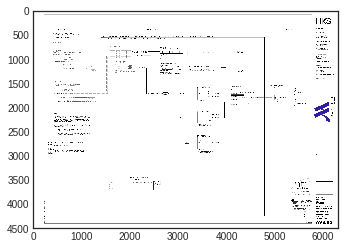

In [135]:
plt.figure()
plt.imshow(plane_img);

In [142]:
json_name = 'predicted_1_16_strings.json'
json_file = '/home/dzyga/My/Python/ITJim/Projects/OCR/plane_images/calamari_result_v1/' + json_name

In [180]:
# return images from
def crop_with_json(plane_img, json_file, hhh, www):
    """ 20/12/19 by N.
    """
    test_folder = '/home/dzyga/My/Python/ITJim/Projects/OCR/plane_images/result_test/'
    
    with open(json_file, "r") as file:
        text_regions = json.load(file)
        
    images = {}
    for i, box in enumerate(text_regions['TextRegions']):
        string = box['Text']
        x = box['Region']['X']
        y = box['Region']['Y']
        w = box['Region']['W']
        h = box['Region']['H']
        
        xx = int(x*www)
        yy = int(y*hhh)
        ww = int(w*www)
        hh = int(h*hhh)
        
        im_string = plane_img[yy:yy+hh, xx:xx+ww, :].copy()
        
        image_name = str(i) + '.png'
        cv2.imwrite(test_folder + image_name, im_string)
                
        images[str(i)] = [string, im_string, (xx, yy, ww, hh)]
     
    with open(test_folder + 'source.txt',"w+") as f:
        f.write(json_file)
            
    return images

#text_images = crop_with_json(plane_img, json_file)

### working with text 

In [57]:
# # string_list = string.split(' ')
# # if len(string_list) > 1: 
    
# # #     lpc = w/len(string) # length per char
# # #     w_word = [len(s) * lpc + lpc for s in string_list] 
# #     lpc = w/font.getsize(string)[0] # length per char
# #     w_word = [font.getsize(w)[0] * lpc for w in string_list]
# #     w_word = np.asarray(w_word)
# #     x_word = x + np.cumsum(w_word) - w_word[0]

# im_words = []
# delta = 0.5*lpc # add some space 
# for i, word in enumerate(string_list):
#     x1 = x_word[i] - delta
#     y1 = y
#     w1 = w_word[i] + 2*delta
#     h1 = h

#     X = int((x1)*imw)
#     Y = int(y1*imh)
#     H = int(np.floor(h1*imh))
#     W = int(np.floor((w1)*imw))

#     #for xx, ww in zip((x_word*imw).astype(int), (w_word*imw).astype(int)):
#     img = plane_img[Y:Y+H, X:X+W, :].copy()
#     im_words.append(img)

# #     print('**', word)
# #     print(len(word))
# #     print(font.getsize(word)[0])

# print(len(string_list))
# fig, ax = plt.subplots(len(im_words)+1, 1)

# for i, axi in enumerate(ax.flat):
#     if i == 0:
#         axi.imshow(im_string)
#         axi.set(xticks=[], yticks=[]);
#     else: 
#         test_image = im_words[i-1]
#         axi.imshow(test_image)
#         axi.set(xticks=[], yticks=[]);

### Working with image v.0

- DV2 -(TO AVB INPUT ON BIAMP EX-MOD)


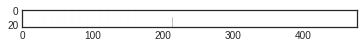

In [190]:
text_images = crop_with_json(plane_img, json_file, imh, imw)
n = 3
string = text_images[str(n)][0]
im_string = text_images[str(n)][1]
im_abs_coord = text_images[str(n)][2]
print(string)
plt.imshow(im_string)

(0, 477)

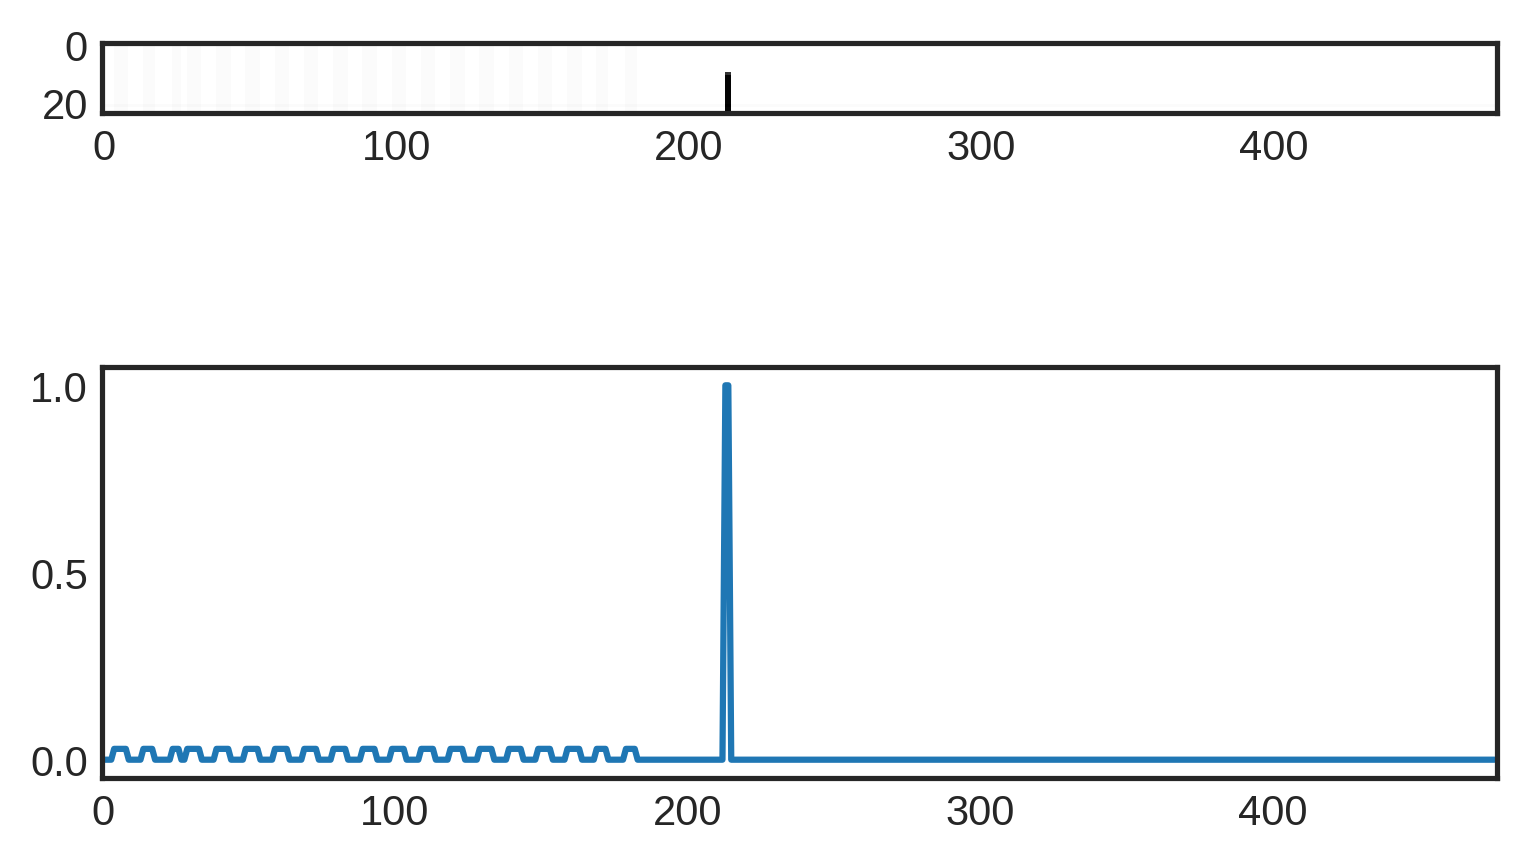

In [186]:
im_string_g = im_string[:,:,0]

# resize
# if im_string_g.shape[0] < 20:
#     scale_percent = 200 # percent of original size
#     width = int(im_string_g.shape[1] * scale_percent / 100)
#     height = int(im_string_g.shape[0] * scale_percent / 100)
#     dim = (width, height)
#     resized = cv2.resize(im_string_g, dim, interpolation = cv2.INTER_AREA) 


text_line = (255-im_string_g).sum(axis = 0)
text_line = text_line / text_line.max()
text_line[text_line > 0.1] = 1

xxx = np.arange(len(text_line))
z_line = np.zeros(len(text_line))

spaces = xxx[text_line<0.5]


# b = np.zeros(1) # kind of histogram
# k = 0 # index of histogram
# j = np.zeros(1, dtype=int) # index where white space starts
# for i in range(len(spaces)-1):
#     if spaces[i+1] - spaces[i] == 1:
#         b[k] += 1 # new item in a bin  
#     else:
#         j = np.append(j, spaces[i+1])
#         b = np.append(b, 1) # move to new bin 
#         k += 1 #  

# b12 = (b/2).astype(int)
# ind_all = j+b12 # indeces moved to half up

# idx = ind_all[b>5] # finally indeces of the middle of the gap!!!!     

# print('length of the string: ', xxx.shape) 
# print('number of indeces where string is 0: ', spaces.shape)
# print('number of white spaces: ', b.shape)
# print('indeces where all gaps starts: ', j)
# print('indeces of the middle of white spaces: ', idx)
fig, ax = plt.subplots(2, 1, dpi=300)
ax[0].imshow(im_string_g, cmap = 'gray')
ax[1].plot(xxx, text_line)
# ax[1].plot(xxx, z_line)
ax[1].set_xlim(0, im_string_g.shape[1])

### v.1

(0, 477)

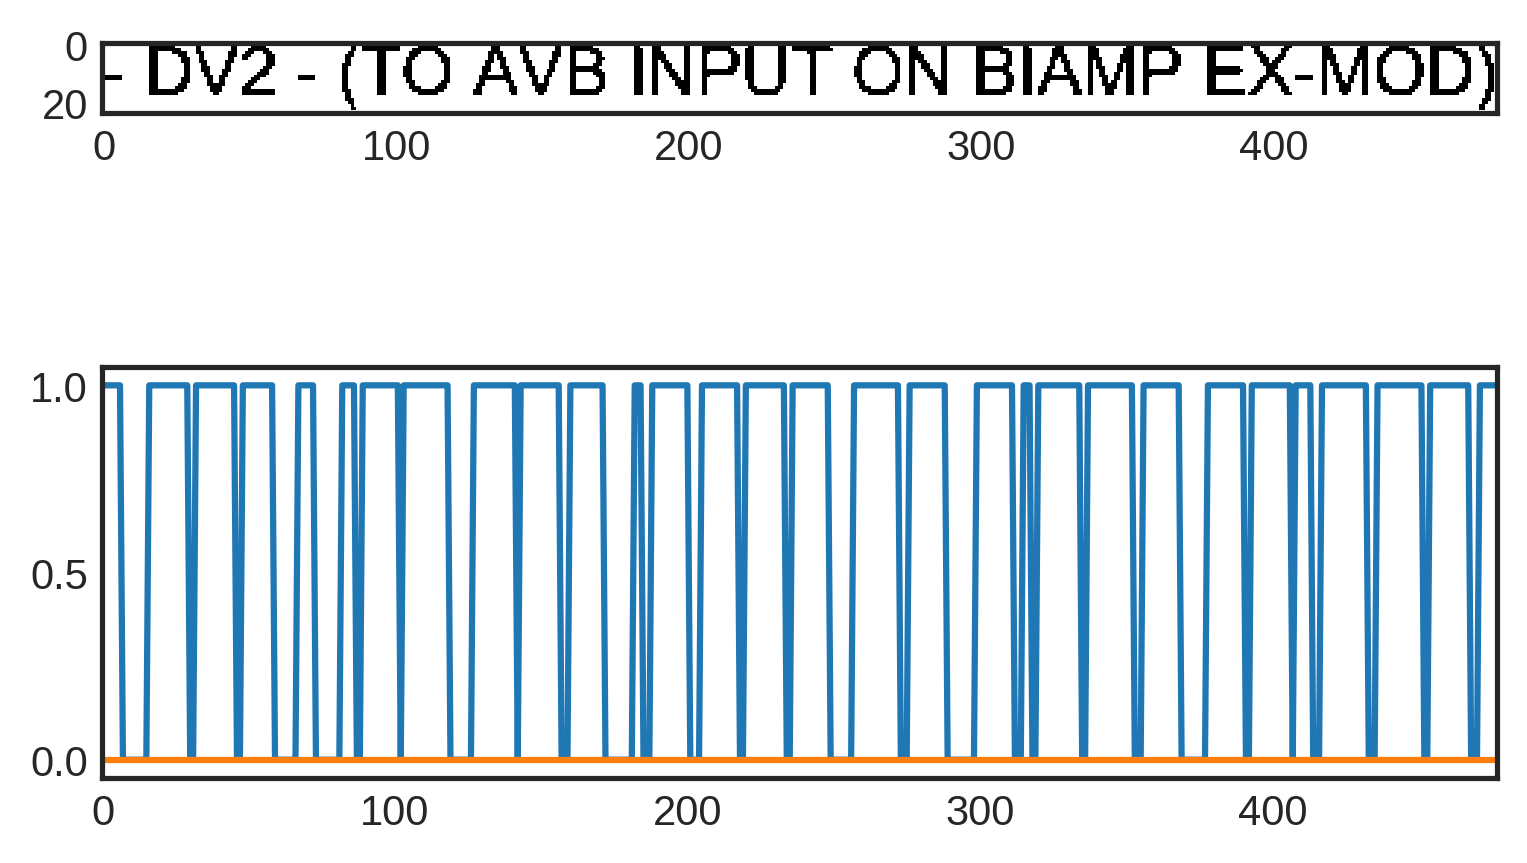

In [167]:
im_string_g = im_string[:,:,0]
_, im_string_g = cv2.threshold(im_string_g, 150, 255,cv2.THRESH_BINARY)
text_line = (255-im_string_g).sum(axis = 0)
text_line = text_line / text_line.max()

text_line[text_line>0.06] = 1 
text_line[text_line<0.5] = 0

text_line[:3] = 1
text_line[-3:] = 1

xxx = np.arange(len(text_line))
z_line = np.zeros(len(text_line))

spaces = xxx[text_line==0]

fig, ax = plt.subplots(2, 1, dpi=300)
ax[0].imshow(im_string_g, cmap = 'gray')
ax[1].plot(xxx, text_line)
ax[1].plot(xxx, z_line)
ax[1].set_xlim(0, im_string.shape[1])
# ax[1].fill_between(xxx, z_line, text_line, color='gray', alpha=0.4)


In [25]:
# b = np.zeros(1) # kind of histogram
# k = 0 # index of histogram
# j = np.zeros(1, dtype=int) # index where white space starts
# for i in range(len(spaces)-1):
#     if spaces[i+1] - spaces[i] == 1:
#         b[k] += 1 # new item in a bin  
#     else:
#         j = np.append(j, spaces[i+1])
#         b = np.append(b, 1) # move to new bin 
#         k += 1 #  

# b12 = (b/2).astype(int)
# ind_all = j+b12 # indeces moved to half up

# # takes n higher 
# #N = len(string_list)
# ind_largest = np.argsort(b)[::-1]
# idx = ind_all[ind_largest]

# print('length of the string: ', xxx.shape) 
# print('number of indeces where string is 0: ', spaces.shape)
# print('number of white spaces: ', b.shape)
# print('indeces where all gaps starts: ', j)
# print('indeces of the middle of white spaces: ', idx)

length of the string:  (316,)
number of indeces where string is 0:  (83,)
number of white spaces:  (22,)
indeces where all gaps starts:  [  0  13  19  36  54  70  92  98 115 123 136 159 175 192 208 224 238 263
 277 293 298 315]
indeces of the middle of white spaces:  [303 140  74 242 228  55  93  99 176  14 294  20 160 193 124 116 209 278
  37 315 263   0]


### working version

In [14]:
def split_image_string(im_string):
    """ 19/12/19 by N.
        im_string - image with text to split; must be in gray scale
        imw - plane image width
    """
    _, im_string_g = cv2.threshold(im_string, 150, 255, cv2.THRESH_BINARY)
    text_line = (255-im_string_g).sum(axis = 0)
    text_line = text_line / text_line.max()

    text_line[text_line>0.06] = 1 
    text_line[text_line<0.5] = 0

    xxx = np.arange(len(text_line))
    z_line = np.zeros(len(text_line))

    spaces = xxx[text_line==0]
    
    b = np.zeros(1) # a kind of histogram
    k = 0 # index of histogram
    j = np.zeros(1, dtype=int) # index where white space starts
    for i in range(len(spaces)-1):
        if spaces[i+1] - spaces[i] == 1:
            b[k] += 1 # new item in a bin  
        else:
            j = np.append(j, spaces[i+1])
            b = np.append(b, 1) # move to new bin 
            k += 1 #  

    b12 = (b/2).astype(int)
    ind_all = j+b12 # indeces moved to half up
    ind_largest = np.argsort(b)[::-1]
    idx = ind_all[ind_largest]
    #idx = ind_all[b>5]
    return idx # in px

index = split_image_string(im_string_g)    

In [127]:
# new words coordinates
# X = 0
print(string)
print(idx.shape)
N = len(string_list)
index = index[:N]
idx = np.sort(index)
idx = np.insert(idx, 0, 0)
idx = np.append(idx, im_string_g.shape[1])

k = np.arange(len(idx)-1)
x_word = np.delete(idx, -1)
w_word = idx[k+1]-idx[k]

print(x_word)
print(w_word)
N

1
(0,)
[  0  55  74 140 228 242 303]
[  55   19   66   88   14   61 -299]


6

ValueError: zero-size array to reduction operation minimum which has no identity

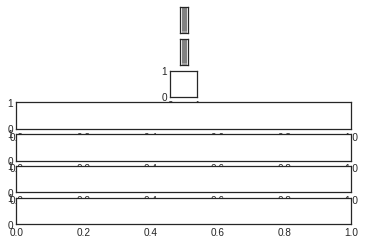

In [128]:
# Cutting! 
im_words = []
for i in range(len(x_word)-1):
    im_word = im_string[:, x_word[i]:x_word[i+1], :]
    #cv2.imwrite(words_folder + str(i) + '.png', im_word)
    im_words.append(im_word)

fig, ax = plt.subplots(len(im_words)+1, 1)

for i, axi in enumerate(ax.flat):
    if i == 0:
        axi.imshow(im_string)
        axi.set(xticks=[], yticks=[]);
    else: 
        test_image = im_words[i-1]
        axi.imshow(test_image)
        axi.set(xticks=[], yticks=[]);


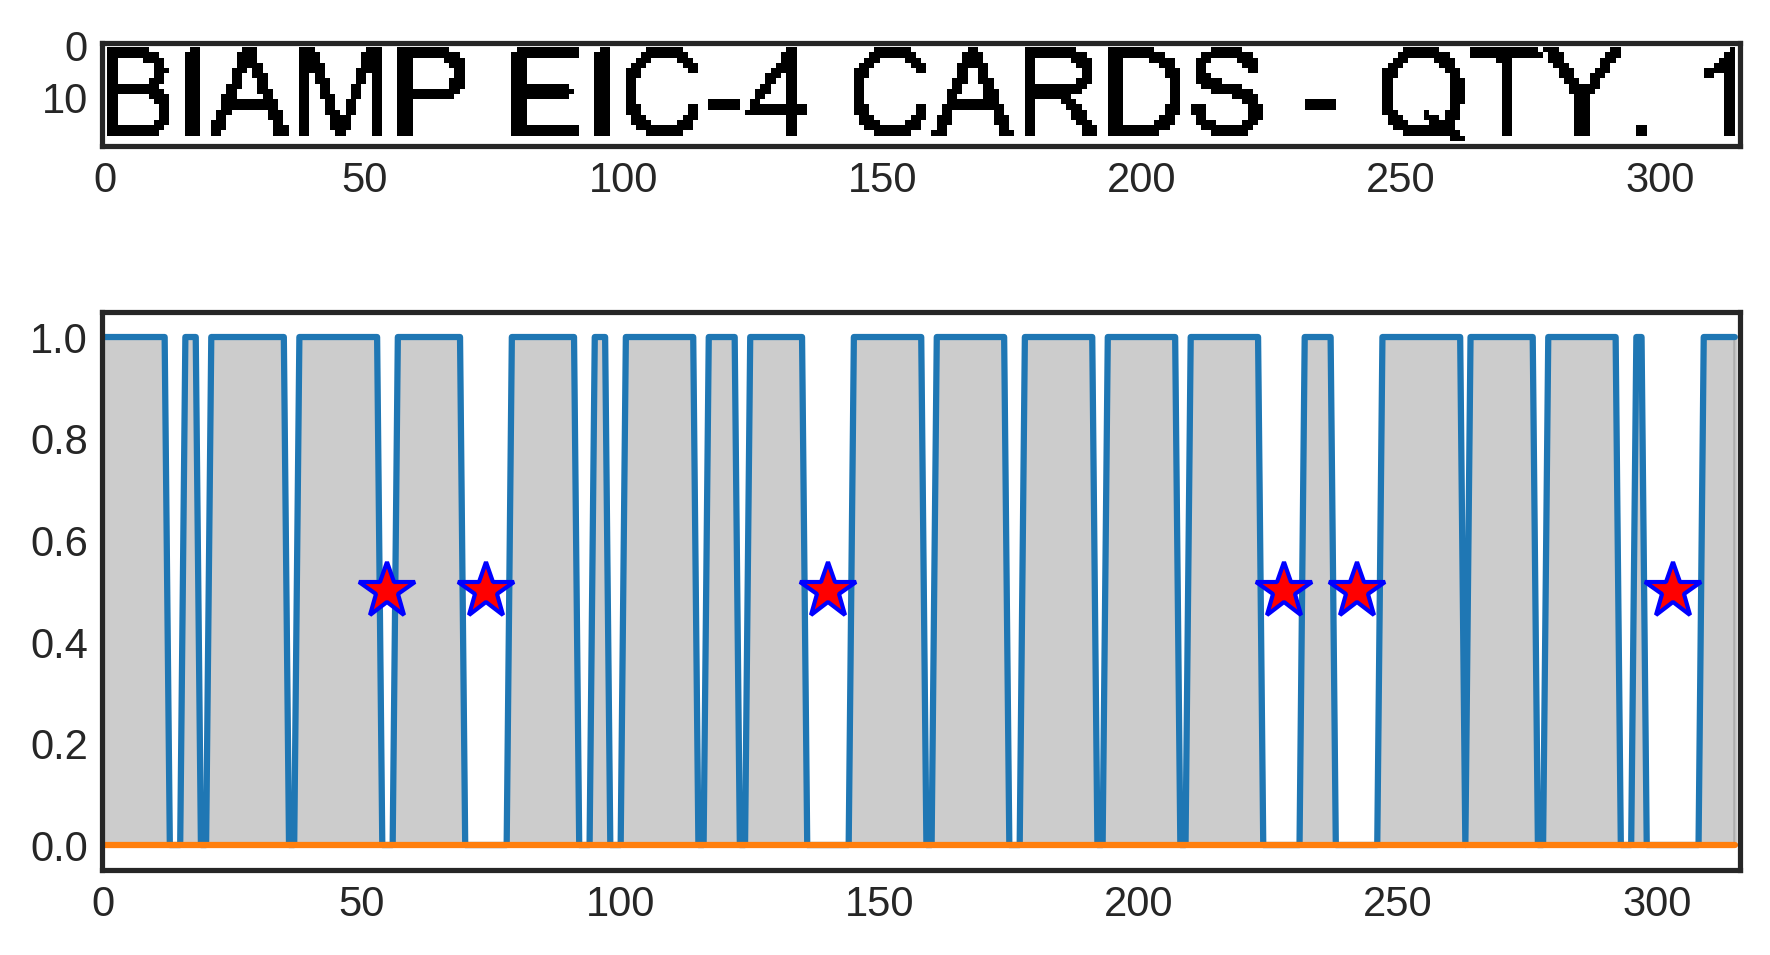

In [17]:
# nice plotting
fig, ax = plt.subplots(2, 1, dpi=300)
ax[0].imshow(im_string_g, cmap = 'gray')
ax[1].plot(xxx, text_line)
ax[1].plot(xxx, z_line)
ax[1].set_xlim(0, im_string.shape[1])
ax[1].fill_between(xxx, z_line, text_line, color='gray', alpha=0.4)
ax[1].plot(idx[1:-1], np.ones(len(idx)-2)*0.5, '*', markersize=14, 
                                            markerfacecolor='red',
                                            markeredgecolor='blue')
plt.tight_layout()

In [56]:
# Write new json
def coordinates_to_json():
    """20/12/29 by N.
    """
    text_regions = []
    predicted_txt = [f for f in os.listdir(txt_folder) if f.endswith('.txt')]
    print('Number of predicted words ---> {}'.format(len(predicted_txt)))

    cnt_blank = 0 # has no text inside
    for file in predicted_txt:
        with open(txt_folder + file, 'r') as f:
            key = file[:-9] # number of detection
            word = f.readline()
            if word == 'NETGEAR AGM732F':
                print('fucking word AGM is here {}'.format(key))
            if len(word)<1:
                cnt_blank += 1
                # print('The {}st prediction is blank'.format(key))
                # print('')

            x = gt_boxes[key][0]
            y = gt_boxes[key][1]
            w = gt_boxes[key][2]
            h = gt_boxes[key][3]

            text_regions.append({"Text": word,
                                     "Region": {
                                         "X": x,
                                         "Y": y,
                                         "W": w,
                                         "H": h }
                                     })
    
    results_for_json = {"TextRegions": text_regions}
    json_output_file = res_folder + json_output_name
    jstr = json.dumps(results_for_json, indent=2)

    with open(json_output_file, 'wt') as outfile:
        for s in jstr:
            outfile.write(s)
    print('Found {} boxes with no text'.format(cnt_blank))
    print('Wrote to {}'.format(json_output_file))

#
#
#  Check crop plane image wiht new json with word coordinates

In [181]:
No = '12_5'
plan_img_file_name = No+'.png'
plane_img = cv2.imread(root_folder + 'good gt images/' + plan_img_file_name)
imhhhh = plane_img.shape[0]
imwwww = plane_img.shape[1]
json_file_w = '/home/dzyga/My/Python/ITJim/Projects/OCR/plane_images/calamari_result/json_words/' + No +'_strings.json'

text_images = crop_with_json(plane_img, json_file_w, imhhhh, imwwww)

In [177]:
len(text_images)

512

e1


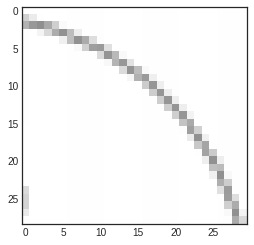

In [179]:
#n = 1000 # WTF ??? no 1_16
n = 
print(text_images[str(n)][0])
im = text_images[str(n)][1]
plt.imshow(im);

In [129]:
_, im_string_g = cv2.threshold(im_string, 150, 255, cv2.THRESH_BINARY)
text_line = (255-im_string_g).sum(axis = 0)
text_line = text_line / text_line.max()

text_line[text_line>0.06] = 1 
text_line[text_line<0.5] = 0

xxx = np.arange(len(text_line))
z_line = np.zeros(len(text_line))

spaces = xxx[text_line==0]

IndexError: too many indices for array

### This works for 12-30